In [1]:
import torch, detectron2

from detectron2.engine import DefaultPredictor
from detectron2.config import  get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog, build_detection_test_loader, build_detection_test_loader
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.utils.logger import setup_logger
from detectron2.data.datasets import register_coco_instances


import cv2
import matplotlib.pyplot as plt
import os

import data_loaders
import json

### Create a configuration

In [2]:
classes = ['person', 'bicycle', "car", 'motorcycle', 'bus', 'truck', 'traffic light', 'stop sign', 'parking meter',
            'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
            'backpack',
            'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
            'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
            'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
            'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
            'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
            'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [3]:
setup_logger()

DATA_NAME = 'ai_cities_coco'
MODEL_WEIGHTS =  model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml") #"random_no_shuffle_keep/faster_no_shuffled/model_final.pth"

## Custom Weights

cfg = get_cfg()
#cfg.defrost()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = MODEL_WEIGHTS
cfg.DATASETS.TEST = (DATA_NAME + "_test",)
cfg.OUTPUT_DIR = str("./non_finetunned")

## Create Environment
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
#cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2

validation_data = "datafolds/first.json"
loader = data_loaders.load_sequential_hold_out
data_type = "val"


DatasetCatalog.register(DATA_NAME + "_test", lambda d=data_type: loader(d))
MetadataCatalog.get(DATA_NAME + "_test").set(thing_classes=classes)#["car", "bike"])




namespace(name='ai_cities_coco_test',
          thing_classes=['person',
                         'bicycle',
                         'car',
                         'motorcycle',
                         'bus',
                         'truck',
                         'traffic light',
                         'stop sign',
                         'parking meter',
                         'bench',
                         'bird',
                         'cat',
                         'dog',
                         'horse',
                         'sheep',
                         'cow',
                         'elephant',
                         'bear',
                         'zebra',
                         'giraffe',
                         'backpack',
                         'umbrella',
                         'handbag',
                         'tie',
                         'suitcase',
                         'frisbee',
                         'skis',
             

In [4]:
evaluator = COCOEvaluator(
    DATA_NAME + "_test",
    output_dir=str("./non_finetunned"),
    )

predictor = DefaultPredictor(cfg)
val_loader = build_detection_test_loader(cfg, DATA_NAME + "_test")

[03/06 11:41:13 d2.evaluation.coco_evaluation]: Trying to convert 'ai_cities_coco_test' to COCO format ...
WARNING [03/06 11:41:13 d2.data.datasets.coco]: Using previously cached COCO format annotations at './non_finetunned/ai_cities_coco_test_coco_format.json'. You need to clear the cache file if your dataset has been modified.
[03/06 11:41:15 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl ...
[03/06 11:41:15 d2.data.build]: Distribution of instances among all 76 categories:
|   category    | #instances   |   category    | #instances   |   category    | #instances   |
|:-------------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|    person     | 16103        |    bicycle    | 241          |      car      | 0            |
|  motorcycle   | 0            |      bus      | 0            |     truck     | 0           

In [5]:
stats = inference_on_dataset(predictor.model, val_loader, evaluator)
print(stats)

[03/06 11:41:23 d2.evaluation.evaluator]: Start inference on 1605 batches


/home/cboned/miniconda3/envs/detectron/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/06 11:41:25 d2.evaluation.evaluator]: Inference done 11/1605. Dataloading: 0.0010 s/iter. Inference: 0.1097 s/iter. Eval: 0.0003 s/iter. Total: 0.1110 s/iter. ETA=0:02:56
[03/06 11:41:30 d2.evaluation.evaluator]: Inference done 56/1605. Dataloading: 0.0014 s/iter. Inference: 0.1104 s/iter. Eval: 0.0003 s/iter. Total: 0.1121 s/iter. ETA=0:02:53
[03/06 11:41:35 d2.evaluation.evaluator]: Inference done 101/1605. Dataloading: 0.0015 s/iter. Inference: 0.1107 s/iter. Eval: 0.0003 s/iter. Total: 0.1125 s/iter. ETA=0:02:49
[03/06 11:41:40 d2.evaluation.evaluator]: Inference done 146/1605. Dataloading: 0.0015 s/iter. Inference: 0.1108 s/iter. Eval: 0.0003 s/iter. Total: 0.1127 s/iter. ETA=0:02:44
[03/06 11:41:45 d2.evaluation.evaluator]: Inference done 191/1605. Dataloading: 0.0015 s/iter. Inference: 0.1108 s/iter. Eval: 0.0003 s/iter. Total: 0.1126 s/iter. ETA=0:02:39
[03/06 11:41:51 d2.evaluation.evaluator]: Inference done 236/1605. Dataloading: 0.0015 s/iter. Inference: 0.1109 s/iter. E

In [ ]:
with open("./non_finetunned/stats_offshelf.json", 'w') as f_stats:
    json.dump(stats, f_stats)

### Register the Dataset:

In [4]:
validation_data = "datafolds/val_random.json"
loader = data_loaders.load_random_data
data_type = "val"


MetadataCatalog.get("val_dataset").set(thing_classes=CLASSES)#["car", "bike"])
DatasetCatalog.register(f"{data_type}_dataset", lambda d=data_type: loader(d))

### Create a Evaluator 

In [5]:
evaluator = COCOEvaluator("val_dataset", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "val_dataset")

### Do the Evaluation

In [6]:
predictor = DefaultPredictor(cfg)
inference_on_dataset(predictor.model, val_loader , evaluator)

/home/cboned/miniconda3/envs/detectron/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Loading and preparing results...
DONE (t=0.17s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.008
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.009
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50

OrderedDict([('bbox',
              {'AP': 0.2869192035981859,
               'AP50': 1.871307330063699,
               'AP75': 0.006111722283339444,
               'APs': 0.9887615777706802,
               'APm': nan,
               'APl': nan,
               'AP-N/A': nan,
               'AP-person': 0.5732963821909516,
               'AP-bicycle': nan,
               'AP-car': nan,
               'AP-motorcycle': nan,
               'AP-airplane': nan,
               'AP-bus': nan,
               'AP-train': nan,
               'AP-truck': nan,
               'AP-boat': nan,
               'AP-traffic light': nan,
               'AP-fire hydrant': nan,
               'AP-stop sign': nan,
               'AP-parking meter': nan,
               'AP-bench': nan,
               'AP-bird': nan,
               'AP-cat': nan,
               'AP-dog': nan,
               'AP-horse': nan,
               'AP-sheep': nan,
               'AP-cow': nan,
               'AP-elephant': nan,
        

### Create a video with the predictions for each frame (it will take some time)

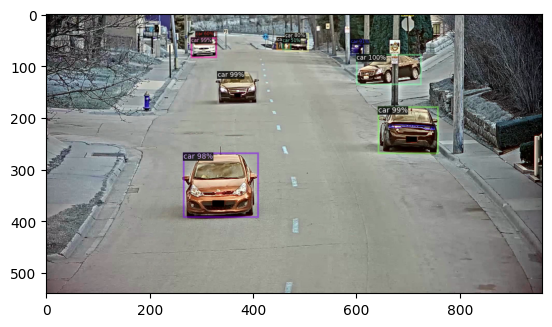

In [6]:
from detectron2.utils.visualizer import ColorMode

#Change this variable to change the path where to save the images
plot_path = os.path.join("plot_results", "non_finetunned")
val_metadata = MetadataCatalog.get(DATA_NAME + "_test").set(thing_classes=classes)#["car", "bike"])

#MetadataCatalog.get(DATA_NAME + "_test")

os.makedirs(plot_path, exist_ok=True)

for i, d in enumerate(val_loader): 
    if i == 10:
        break
    for i in d:
        im = cv2.imread(i["file_name"])
        outputs = predictor(im)
        
        v = Visualizer(im[:, :, ::-1],
                    metadata=val_metadata,
                    scale=0.5,
                    instance_mode=ColorMode.IMAGE    # remove the colors of unsegmented pixels. This option is only available for segmentation models
        )
        instances = outputs["instances"]
        out = v.draw_instance_predictions(instances[instances.pred_classes == 2].to("cpu"))
        boxes = v._convert_boxes(outputs["instances"].pred_boxes.to('cpu')).squeeze()


            
        plt.imshow(out.get_image()[:, :, ::-1])
        cv2.imwrite(plot_path+f"/{i['file_name'].split('/')[-1]}", out.get_image()[:, :, ::-1])